In [19]:
import import_ipynb

In [20]:
import week1

In [21]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [22]:
from week1 import new_df
x=new_df.drop(['Close','weekday_name'],axis=1)
y=new_df['Close'].values

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [24]:
#specify L2 regularization(Ridge)
rd=Ridge()
parameters={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,100,1000,10000]}
rd_reg=GridSearchCV(rd,parameters,scoring='neg_mean_squared_error',cv=5)
rd_reg.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [31]:
print('\nRidge Regression\n')
print("Best parameters:",rd_reg.best_params_)
print("Best score:",rd_reg.best_score_)
best_lr=rd_reg.best_estimator_
coefs=best_lr.coef_
print("Total number of features:",coefs.size)
print("Number of selected features:",np.count_nonzero(coefs))
rd_pred=rd_reg.predict(x_test)
rd_rmse=np.sqrt(metrics.mean_squared_error(y_test, rd_pred))
print("RMSE for Ridge:",rd_rmse)


Ridge Regression

Best parameters: {'alpha': 100}
Best score: -635.5290812848493
Total number of features: 4
Number of selected features: 4
RMSE for Ridge: 22.133567259980616


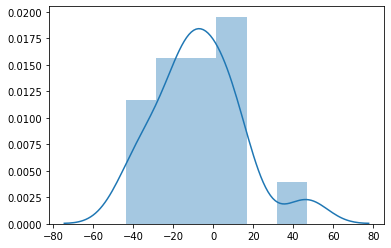

In [32]:
import seaborn as sns
sns.distplot(y_test-rd_pred)

In [33]:
#specify L1 regularization(Lasso)
ls=Lasso()
parameters={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,100,1000,10000]}
ls_reg=GridSearchCV(ls,parameters,scoring='neg_mean_squared_error',cv=5)
ls_reg.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [35]:
print('\nLasso Regression\n')
print("Best parameters:",ls_reg.best_params_)
print("Best score:",ls_reg.best_score_)
best_lr=ls_reg.best_estimator_
coefs=best_lr.coef_
print("Total number of features:",coefs.size)
print("Number of selected features:",np.count_nonzero(coefs))
ls_pred=ls_reg.predict(x_test)
ls_rmse=np.sqrt(metrics.mean_squared_error(y_test, ls_pred))
print("RMSE for Lasso:",rd_rmse)


Lasso Regression

Best parameters: {'alpha': 10}
Best score: -643.2345918873684
Total number of features: 4
Number of selected features: 1
RMSE for Lasso: 22.133567259980616


In [37]:
print('lasso prediction:',ls_pred)
print('\n\nridge prediction:',rd_pred)

lasso prediction: [1121.3846326  1121.3846326  1121.3846326  1122.29499605 1122.29499605
 1121.3846326  1121.3846326  1122.29499605 1121.3846326  1121.3846326
 1121.3846326  1122.29499605 1121.3846326  1112.28099816 1121.3846326
 1122.29499605 1122.29499605]


ridge prediction: [1122.20223914 1122.64667434 1123.49001514 1125.86056549 1122.41890787
 1121.75780393 1124.35612075 1123.28501347 1123.51277994 1123.06834474
 1121.33613353 1121.57556706 1121.35889833 1108.89952558 1123.09110954
 1124.59555428 1121.99723747]


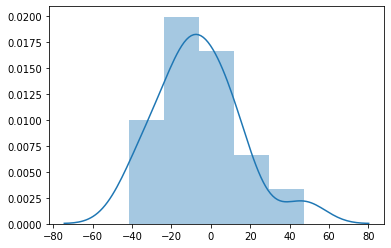

In [38]:
import seaborn as sns
sns.distplot(y_test-ls_pred)